In [1]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import numpy as np

# Face detection and extraction


In [2]:
model=load_model('mask.HDF5')

In [3]:
df=['with_mask', 'without_mask']
font = cv2.FONT_HERSHEY_SIMPLEX
  
# # org
# org = (50, 50)
  
# # fontScale
# fontScale = 1
   
# # Blue color in BGR
# color = (255, 0, 0)
  
# # Line thickness of 2 px
# thickness = 2

In [28]:
cap = cv2.VideoCapture(0)

classifier = cv2.CascadeClassifier(r".\data_1\haarcascade_frontalface_default.xml")

while cap.isOpened():
    _,image=cap.read()
    image=cv2.flip(image,1)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face=classifier.detectMultiScale(gray,scaleFactor=1.5, minNeighbors=3)
    for(x,y,w,h) in face:
        #print(x,y,w,h)
        org = (x-10,y-10)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (0, 255, 10)  
        thickness = 3        
        if face.any() :
            cv2.rectangle(image, (x,y), (x+w ,y+h),(255,0,0) , 2)
            im_face = gray[y:y + h, x:x + w]
            img=img_to_array(im_face)/255
            img=cv2.resize(img,(150,150))
            img=img.reshape(-1,img.shape[0],img.shape[1],1)
            pred=model.predict(img)
            if np.argmax(pred)==1:
                cv2.putText(image,(df[np.argmax(pred)]), org, font,fontScale, (255,0,0), thickness, cv2.LINE_AA)
            else:
                cv2.putText(image,(df[np.argmax(pred)]), org, font,fontScale, (255,255,0), thickness, cv2.LINE_AA)
                
      
    #cv2.imshow('roi',im_face)
    cv2.imshow('im',image)
    key = cv2.waitKey(1)
    if key & 0xFF == 27:
        break
    
    
cap.release()
cv2.destroyAllWindows()
    

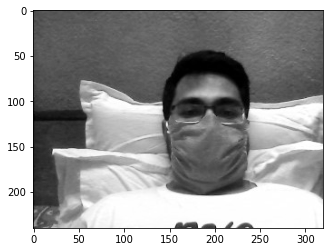

In [10]:
#im=cv2.imread(r"C:\Users\kesha\Pictures\Camera Roll\WIN_20210522_23_07_21_Pro.jpg")
im=cv2.imread(r"C:\Users\kesha\Pictures\Camera Roll\WIN_20210522_23_10_01_Pro.jpg",0)
import matplotlib.pyplot as plt
plt.imshow(im,cmap='gray')

In [11]:
#im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im=img_to_array(im/255)

im=cv2.resize(im,(150,150))
im=im.reshape(-1,im.shape[0],im.shape[1],1)
pr=model.predict(im)

In [12]:
pr

array([[0.11504737, 0.88495266]], dtype=float32)

In [16]:
type(np.argmax(pr))

numpy.int64

In [20]:
pr[0][np.argmax(pr)]

0.88495266

In [19]:
pr[0][1]

0.88495266